<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/projects/football_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Settings


In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu
from scipy import stats

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
appereances_path = '/content/drive/MyDrive/Colab Notebooks/Football/appearances.csv'
club_games_path = '/content/drive/MyDrive/Colab Notebooks/Football/club_games.csv'
clubs_path = '/content/drive/MyDrive/Colab Notebooks/Football/clubs.csv'
competitions_path = '/content/drive/MyDrive/Colab Notebooks/Football/competitions.csv'
game_events_path = '/content/drive/MyDrive/Colab Notebooks/Football/game_events.csv'
game_lineups_path = '/content/drive/MyDrive/Colab Notebooks/Football/game_lineups.csv'
games_path = '/content/drive/MyDrive/Colab Notebooks/Football/games.csv'
player_valuation_path = '/content/drive/MyDrive/Colab Notebooks/Football/player_valuations.csv'
players_path = '/content/drive/MyDrive/Colab Notebooks/Football/players.csv'
transfers_path = '/content/drive/MyDrive/Colab Notebooks/Football/transfers.csv'

In [146]:
transfers = pd.read_csv(transfers_path)

In [147]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         51931 non-null  float64
 8   market_value_in_eur  49330 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


In [148]:
players = pd.read_csv(players_path)

In [149]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

In [150]:
player_valuation = pd.read_csv(player_valuation_path)

In [151]:
player_valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            496606 non-null  int64 
 1   date                                 496606 non-null  object
 2   market_value_in_eur                  496606 non-null  int64 
 3   current_club_id                      496606 non-null  int64 
 4   player_club_domestic_competition_id  496606 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.9+ MB


In [152]:
games = pd.read_csv(games_path)

In [153]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 74026 non-null  int64  
 1   competition_id          74026 non-null  object 
 2   season                  74026 non-null  int64  
 3   round                   74026 non-null  object 
 4   date                    74026 non-null  object 
 5   home_club_id            74017 non-null  float64
 6   away_club_id            74017 non-null  float64
 7   home_club_goals         74014 non-null  float64
 8   away_club_goals         74014 non-null  float64
 9   home_club_position      51559 non-null  float64
 10  away_club_position      51559 non-null  float64
 11  home_club_manager_name  73198 non-null  object 
 12  away_club_manager_name  73198 non-null  object 
 13  stadium                 73776 non-null  object 
 14  attendance              64078 non-null

In [154]:
game_events = pd.read_csv(game_events_path)

In [155]:
game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035043 entries, 0 to 1035042
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   game_event_id     1035043 non-null  object 
 1   date              1035043 non-null  object 
 2   game_id           1035043 non-null  int64  
 3   minute            1035043 non-null  int64  
 4   type              1035043 non-null  object 
 5   club_id           1035043 non-null  int64  
 6   player_id         1035043 non-null  int64  
 7   description       947716 non-null   object 
 8   player_in_id      497678 non-null   float64
 9   player_assist_id  156759 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 79.0+ MB


In [156]:
game_events.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [157]:
game_events.description.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1035043 entries, 0 to 1035042
Series name: description
Non-Null Count   Dtype 
--------------   ----- 
947716 non-null  object
dtypes: object(1)
memory usage: 7.9+ MB


In [158]:
competitions = pd.read_csv(competitions_path)

In [159]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   competition_id            44 non-null     object
 1   competition_code          44 non-null     object
 2   name                      44 non-null     object
 3   sub_type                  44 non-null     object
 4   type                      44 non-null     object
 5   country_id                44 non-null     int64 
 6   country_name              36 non-null     object
 7   domestic_league_code      36 non-null     object
 8   confederation             44 non-null     object
 9   url                       44 non-null     object
 10  is_major_national_league  44 non-null     bool  
dtypes: bool(1), int64(1), object(9)
memory usage: 3.6+ KB


In [160]:
competitions

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...,False
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...,False
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...,False
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...,False
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True


In [161]:
clubs = pd.read_csv(clubs_path)

In [162]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [163]:
clubs.domestic_competition_id

,domestic_competition_id
0,L1
1,RU1
2,TR1
3,IT1
4,GB1
...,...
434,NL1
435,IT1
436,UKR1
437,PO1


In [164]:
clubs.domestic_competition_id
top5_ligue = ['Spain', 'France', 'Italy', 'England', 'Germany']

In [165]:
competitions

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False
5,SUC,supercopa,supercopa,domestic_super_cup,other,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/supercopa/star...,False
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...,False
7,DK1,superligaen,superligaen,first_tier,domestic_league,39,Denmark,DK1,europa,https://www.transfermarkt.co.uk/superligaen/st...,False
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...,False
9,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,https://www.transfermarkt.co.uk/laliga/startse...,True


In [166]:
club_games = pd.read_csv(club_games_path)

In [167]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148052 entries, 0 to 148051
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                148052 non-null  int64  
 1   club_id                148034 non-null  float64
 2   own_goals              148028 non-null  float64
 3   own_position           103118 non-null  float64
 4   own_manager_name       146396 non-null  object 
 5   opponent_id            148034 non-null  float64
 6   opponent_goals         148028 non-null  float64
 7   opponent_position      103118 non-null  float64
 8   opponent_manager_name  146396 non-null  object 
 9   hosting                148052 non-null  object 
 10  is_win                 148052 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 12.4+ MB


In [168]:
appereances = pd.read_csv(appereances_path)

In [169]:
appereances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB


In [170]:
appereances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706801,4547798_811779,4547798,811779,985,985,2025-04-10,Alejandro Garnacho,EL,0,0,0,0,83
1706802,4547798_820374,4547798,820374,985,985,2025-04-10,Kobbie Mainoo,EL,1,0,0,0,7
1706803,4547798_923831,4547798,923831,985,985,2025-04-10,Leny Yoro,EL,0,0,1,0,90
1706804,4547798_926952,4547798,926952,985,985,2025-04-10,Patrick Dorgu,EL,0,0,0,0,90


# Гипотезы


*   Домашнее поле даёт преимущество
*   Больше ударов → выше шанс на победу
*   Возраст влияет на результативность
*   VAR влияет на дисциплину
*   У дорогих игроков всегда хорошая результативность
*   Вратари всегда выше чем полевые игроки


# Гипотеза №1
#### У дорогих игроков результативность лучше

In [ ]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'], errors='coerce')

In [ ]:
today = pd.to_datetime('today')
players['age'] = (today - players['date_of_birth']).dt.days // 365

In [ ]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'age'],
      dtype='object')

In [ ]:
numeric_cols = transfers.select_dtypes(include='number')
corr_coef = numeric_cols.corr()

<Axes: >

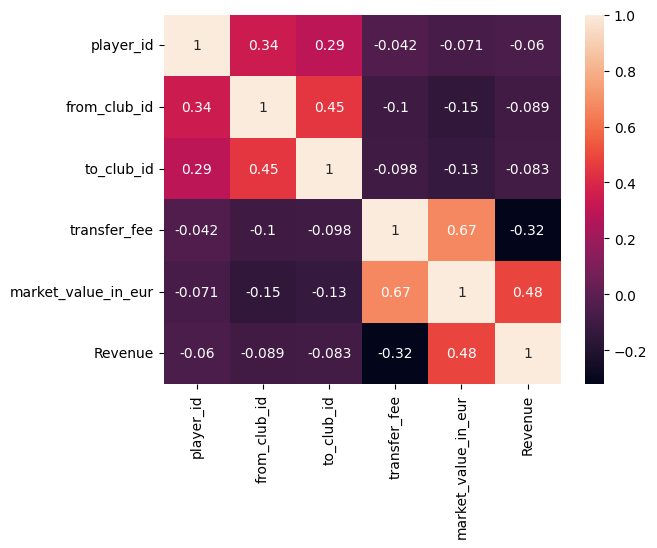

In [ ]:
sns.heatmap(corr_coef, annot=True)

**Явно выраженной корреляции мы не наблюдаем.
Попробуем сузить нашу выборку**

In [ ]:
def cat(top):
  top_dict = {
    i: clubs.loc[clubs.club_id == i, 'domestic_competition_id'].values[0]
    if not clubs.loc[clubs.club_id == i, 'domestic_competition_id'].empty else np.nan
    for i in top['to_club_id']
  }
  return top_dict


In [ ]:
numeric_cols = transfers.select_dtypes(include='number')
corr_coef = numeric_cols.corr()

In [ ]:
players.current_club_domestic_competition_id.value_counts()

,count
current_club_domestic_competition_id,
TR1,3220
IT1,3178
PO1,2656
GR1,2601
FR1,2248
NL1,2233
BE1,2219
ES1,2217
RU1,2182


In [180]:
competitions.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False


In [183]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Goals
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,48.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0,0.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,NaN
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0,NaN
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0,NaN


In [182]:
domestic = dict(zip(competitions.domestic_league_code, competitions.country_name))

In [ ]:
threshold = np.quantile(players.loc[players['highest_market_value_in_eur'].notnull(), 'highest_market_value_in_eur'], 0.98)
threshold

np.float64(35000000.0)

In [ ]:
players = players.merge(counts[['player_id', 'Goals']], on = 'player_id', how='left')

In [171]:
exp_goals

,Goals
187,84.0
205,197.0
278,24.0
320,91.0
322,67.0
...,...
31174,21.0
31226,9.0
31433,7.0
31589,31.0


In [175]:
players = players.merge(counts[['player_id', 'Goals']], on='player_id', how='left')

In [176]:
exp_goals = players.loc[(players['position'] == 'Attack')&(players['highest_market_value_in_eur'] > threshold), 'Goals']

In [184]:
other_goals = players.loc[(players['position'] == 'Attack')&(players['highest_market_value_in_eur'] < threshold)&
                          (players.current_club_domestic_competition_id.map(domestic).isin(top5_league))&(players.Goals.notna()), 'Goals']

In [190]:
exp_mean = exp_goals.mean().round().item()
other_mean = other_goals.mean().round().item()

print(f'Среднее кол-во голов нападающих, у которых цена была выше 35 млн евро: {exp_goals.mean().round().item()}')
print(f'Среднее кол-во голов нападающих, у которых цена была меньше 35 млн евро: {other_goals.mean().round().item()}')

Среднее кол-во голов нападающих, у которых цена была выше 35 млн евро: 96.0
Среднее кол-во голов нападающих, у которых цена была меньше 35 млн евро: 14.0


**Наша гипотеза была верна: у дорогих игроков результативность действительно лучше.**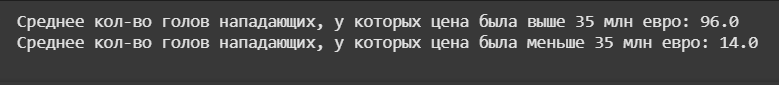

# Распределение ростов игроков по их позициям

In [ ]:
counts = counts.merge(players[['position', 'player_id']], on = 'player_id', how = 'left')

In [ ]:
counts.position.value_counts()

,count
position,
Defender,8340
Midfield,7655
Attack,7476
Goalkeeper,1670
Missing,70


Text(0.5, 1.0, 'Рост вратарей')

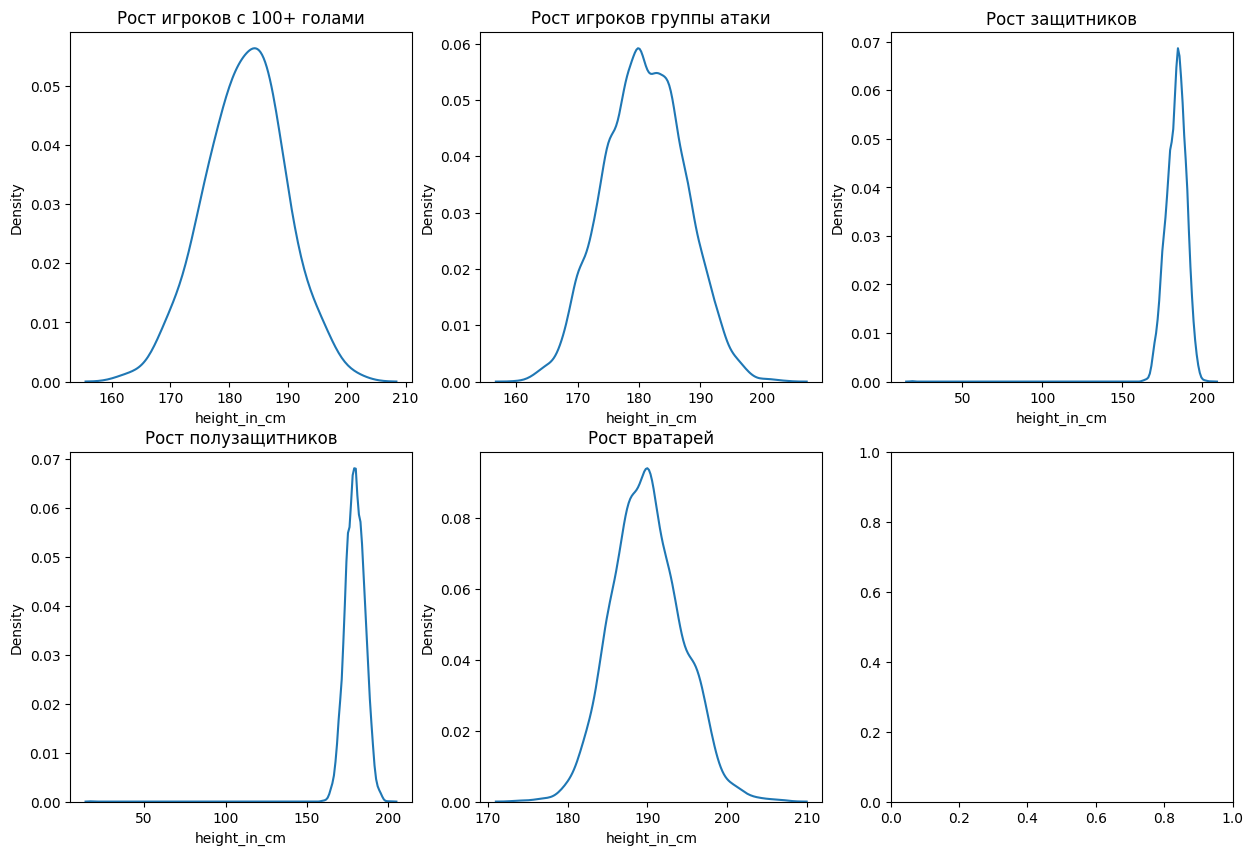

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.kdeplot(counts.loc[counts.Goals > 100, 'height_in_cm'], ax=ax[0, 0]).set_title('Рост игроков с 100+ голами')
sns.kdeplot(counts.loc[counts.position == 'Attack', 'height_in_cm'], ax=ax[0, 1]).set_title('Рост игроков группы атаки')
sns.kdeplot(counts.loc[counts.position == 'Defender', 'height_in_cm'], ax=ax[0, 2]).set_title('Рост защитников')
sns.kdeplot(counts.loc[counts.position == 'Midfield', 'height_in_cm'], ax=ax[1, 0]).set_title('Рост полузащитников')
sns.kdeplot(counts.loc[counts.position == 'Goalkeeper', 'height_in_cm'], ax=ax[1, 1]).set_title('Рост вратарей')
# sns.kdeplot(counts.loc[counts.Goals > 100, 'height_in_cm'], ax=ax[0, 0]).set_title('Рост игроков с 100+ голами')

Text(0.5, 1.0, 'Рост вратарей')

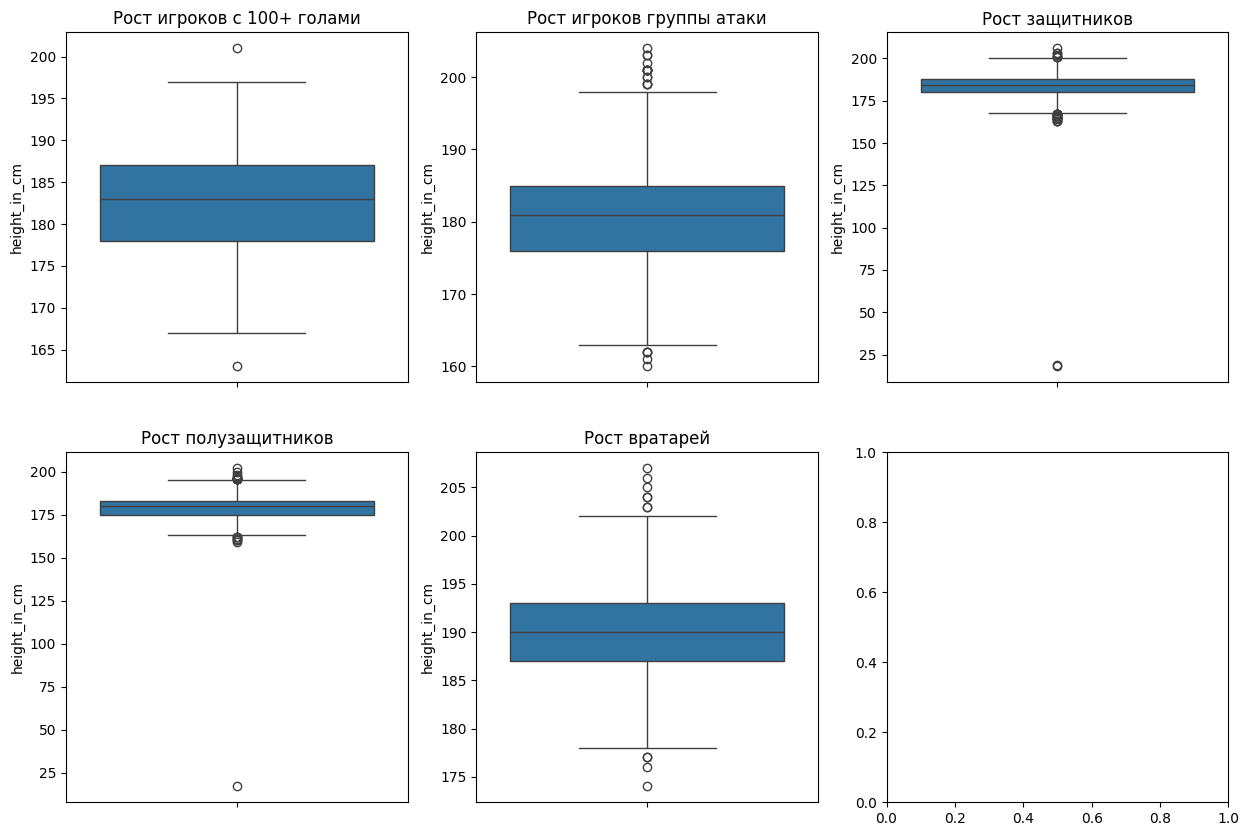

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(counts.loc[counts.Goals > 100, 'height_in_cm'], ax=ax[0, 0]).set_title('Рост игроков с 100+ голами')
sns.boxplot(counts.loc[counts.position == 'Attack', 'height_in_cm'], ax=ax[0, 1]).set_title('Рост игроков группы атаки')
sns.boxplot(counts.loc[counts.position == 'Defender', 'height_in_cm'], ax=ax[0, 2]).set_title('Рост защитников')
sns.boxplot(counts.loc[counts.position == 'Midfield', 'height_in_cm'], ax=ax[1, 0]).set_title('Рост полузащитников')
sns.boxplot(counts.loc[counts.position == 'Goalkeeper', 'height_in_cm'], ax=ax[1, 1]).set_title('Рост вратарей')

In [ ]:
counts = counts[counts.height_in_cm >= 150]

Text(0.5, 1.0, 'Рост вратарей')

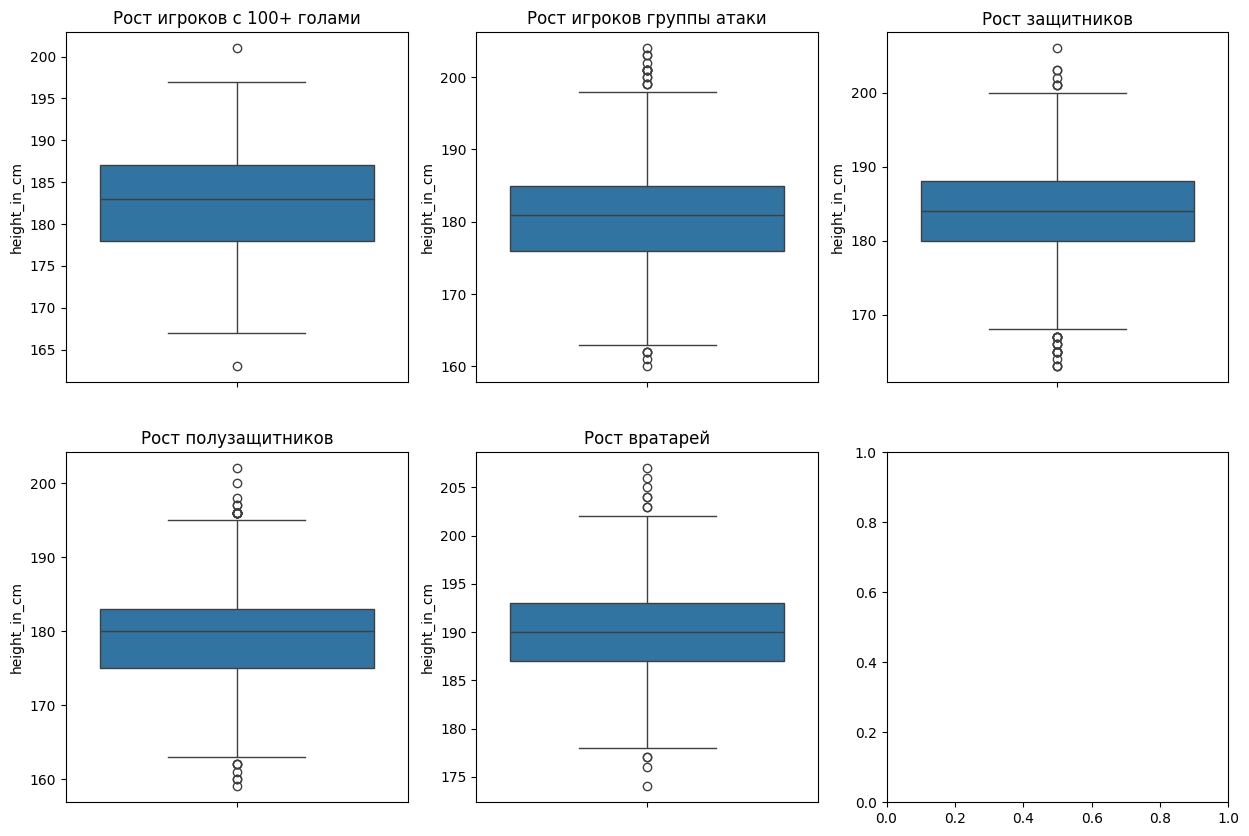

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(counts.loc[counts.Goals > 100, 'height_in_cm'], ax=ax[0, 0]).set_title('Рост игроков с 100+ голами')
sns.boxplot(counts.loc[counts.position == 'Attack', 'height_in_cm'], ax=ax[0, 1]).set_title('Рост игроков группы атаки')
sns.boxplot(counts.loc[counts.position == 'Defender', 'height_in_cm'], ax=ax[0, 2]).set_title('Рост защитников')
sns.boxplot(counts.loc[counts.position == 'Midfield', 'height_in_cm'], ax=ax[1, 0]).set_title('Рост полузащитников')
sns.boxplot(counts.loc[counts.position == 'Goalkeeper', 'height_in_cm'], ax=ax[1, 1]).set_title('Рост вратарей')

Text(0.5, 1.0, 'Рост вратарей')

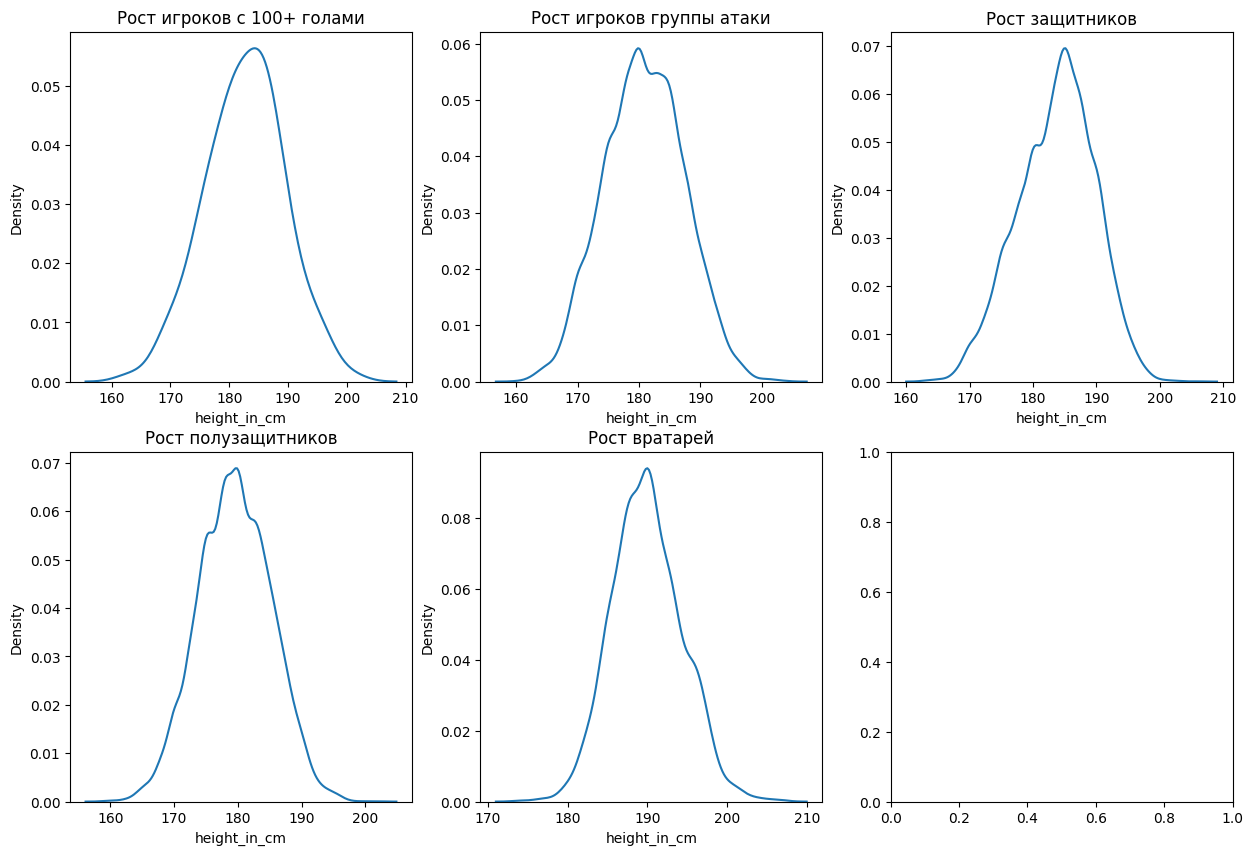

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.kdeplot(counts.loc[counts.Goals > 100, 'height_in_cm'], ax=ax[0, 0]).set_title('Рост игроков с 100+ голами')
sns.kdeplot(counts.loc[counts.position == 'Attack', 'height_in_cm'], ax=ax[0, 1]).set_title('Рост игроков группы атаки')
sns.kdeplot(counts.loc[counts.position == 'Defender', 'height_in_cm'], ax=ax[0, 2]).set_title('Рост защитников')
sns.kdeplot(counts.loc[counts.position == 'Midfield', 'height_in_cm'], ax=ax[1, 0]).set_title('Рост полузащитников')
sns.kdeplot(counts.loc[counts.position == 'Goalkeeper', 'height_in_cm'], ax=ax[1, 1]).set_title('Рост вратарей')

In [ ]:
def avxli(positions):
    return {
        "mean": np.mean(positions),
        "q25": np.quantile(positions, 0.25),
        "median": np.quantile(positions, 0.5),
        "q75": np.quantile(positions, 0.75),
        "mean - std": np.mean(positions) - np.std(positions),
        "mean + std": np.mean(positions) + np.std(positions)
    }

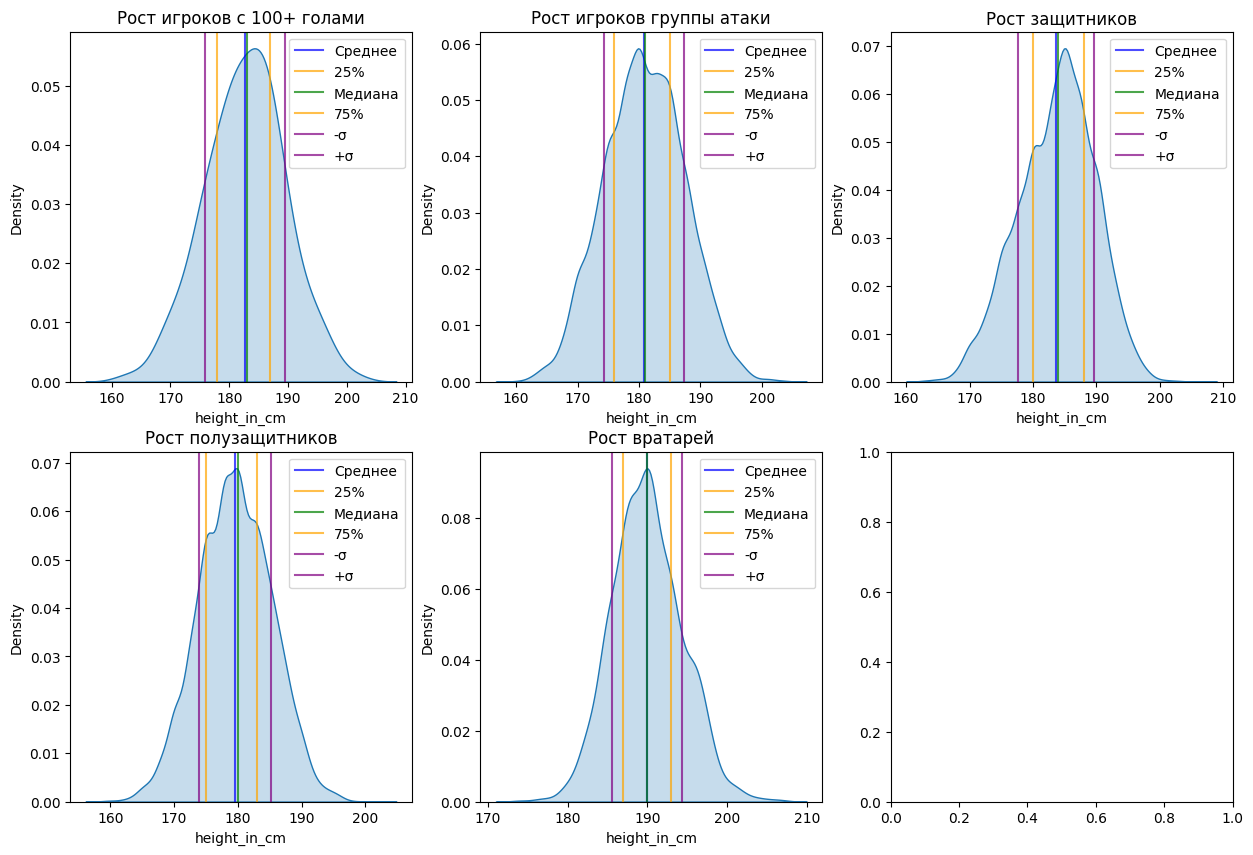

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
counts = counts[counts.height_in_cm >= 150]
line_styles = {
    "mean": ("blue", "Среднее"),
    "median": ("green", "Медиана"),
    "q25": ("orange", "25%"),
    "q75": ("orange", "75%"),
    "mean - std": ("purple", "-σ"),
    "mean + std": ('purple', '+σ')
}

plots = [
    (counts.loc[counts.Goals > 100, 'height_in_cm'], "Рост игроков с 100+ голами"),
    (counts.loc[counts.position == 'Attack', 'height_in_cm'], "Рост игроков группы атаки"),
    (counts.loc[counts.position == 'Defender', 'height_in_cm'], "Рост защитников"),
    (counts.loc[counts.position == 'Midfield', 'height_in_cm'], "Рост полузащитников"),
    (counts.loc[counts.position == 'Goalkeeper', 'height_in_cm'], "Рост вратарей"),
]

axes = ax.ravel()
for (data, title), axis in zip(plots, axes):
    sns.kdeplot(data, ax=axis, fill=True)
    axis.set_title(title)
    metrics = avxli(data)

    for key, val in metrics.items():
        color, label = line_styles[key]
        axis.axvline(val, color=color,  alpha=0.7, label=label)

    handles, labels = axis.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axis.legend(by_label.values(), by_label.keys())

In [195]:
positions = players.position.unique()[:-1]
positions

array(['Attack', 'Goalkeeper', 'Defender', 'Midfield'], dtype=object)

In [214]:
total = []
for position in positions:
  total.append(avxli(players.loc[players.position == position, 'height_in_cm'])['mean'].round(2).item())

In [215]:
dict_ = dict(zip(positions, total))
for k, v in dict_.items():
  print(f'{k}: {v}')

Attack: 180.77
Goalkeeper: 189.68
Defender: 183.64
Midfield: 179.42


**Наша гитотеза верна - действительно вратари в среднем выше чем полевые игроки**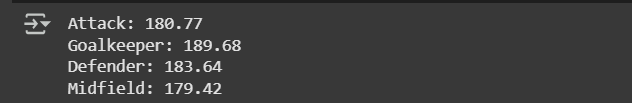

# Статистика голов

In [ ]:
game_events.type.value_counts()

,count
type,
Substitutions,498454
Cards,319030
Goals,206320
Shootout,11239


In [ ]:
game_events

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1035038,fd6398da8baafd9d3fed4994482d34f1,2025-03-29,4572898,114,Cards,1237,700106,"1. Yellow card , Foul",NaN,NaN
1035039,03ed12d2c5be9fc8a9d33c7d32a9fc02,2025-03-29,4572898,-1,Shootout,1237,700106,", Scored",NaN,NaN
1035040,ae97664fa1743abd0cbc8b8b6e3df9af,2025-03-29,4572898,61,Substitutions,703,808509,", Tactical",392768.0,NaN
1035041,e6b9a6e8764febebf29804b7d486efbc,2025-03-29,4572898,-1,Shootout,1237,867688,", Saved",NaN,NaN


In [ ]:
counts = pd.DataFrame()

In [ ]:
counts = game_events.groupby(['player_id', 'type']).size().unstack(fill_value=0)

In [ ]:
counts = counts.merge(players[['player_id', 'name']], on='player_id', how='left')

In [ ]:
counts = counts.merge(players[['player_id', 'sub_position', 'country_of_birth',
                               'height_in_cm', 'date_of_birth', 'current_club_name', 'foot']],
                      on = 'player_id', how = 'left'
                      )

In [ ]:
players.position.value_counts()

,count
position,
Defender,10389
Midfield,9391
Attack,8921
Goalkeeper,3720
Missing,180


In [ ]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'age'],
      dtype='object')

In [ ]:
counts.columns

Index(['player_id', 'Cards', 'Goals', 'Shootout', 'Substitutions', 'name',
       'sub_position', 'country_of_birth', 'height_in_cm', 'date_of_birth',
       'current_club_name', 'foot'],
      dtype='object')

In [ ]:
counts = counts.merge(players[['player_id','highest_market_value_in_eur', 'market_value_in_eur']], on='player_id', how='left')

In [ ]:
counts = counts.merge(players[['player_id', 'age']], on='player_id', how='left')

In [ ]:
counts['date_of_birth'] = counts['date_of_birth'].astype('datetime64[ns]')

In [ ]:
counts['year_of_birth'] = counts['date_of_birth'].dt.year

In [ ]:
counts.sort_values(by='Goals', ascending = False).head(10)

,player_id,Cards,Goals,Shootout,Substitutions,name,sub_position,country_of_birth,height_in_cm,date_of_birth,current_club_name,foot,highest_market_value_in_eur,market_value_in_eur,age,year_of_birth
5300,38253,60,507,6,119,Robert Lewandowski,Centre-Forward,Poland,185.0,1988-08-21,Futbol Club Barcelona,right,90000000.0,15000000.0,37.0,1988.0
3751,28003,50,451,0,30,Lionel Messi,Right Winger,Argentina,170.0,1987-06-24,Paris Saint-Germain Football Club,left,180000000.0,35000000.0,38.0,1987.0
1034,8198,68,433,2,54,Cristiano Ronaldo,Centre-Forward,Portugal,187.0,1985-02-05,Manchester United Football Club,right,120000000.0,15000000.0,40.0,1985.0
18175,132098,52,354,0,99,Harry Kane,Centre-Forward,England,188.0,1993-07-28,FC Bayern München,right,150000000.0,90000000.0,32.0,1993.0
9039,58864,37,295,4,138,Pierre-Emerick Aubameyang,Centre-Forward,France,187.0,1989-06-18,Olympique de Marseille,right,75000000.0,5000000.0,36.0,1989.0
19464,148455,20,294,4,177,Mohamed Salah,Right Winger,Egypt,175.0,1992-06-15,Liverpool Football Club,left,150000000.0,55000000.0,33.0,1992.0
2401,18922,10,289,1,240,Karim Benzema,Centre-Forward,France,185.0,1987-12-19,Real Madrid Club de Fútbol,right,60000000.0,15000000.0,37.0,1987.0
6345,44352,94,289,0,92,Luis Suárez,Centre-Forward,Uruguay,182.0,1987-01-24,Club Atlético de Madrid S.A.D.,right,90000000.0,4000000.0,38.0,1987.0
35500,342229,48,273,1,96,Kylian Mbappé,Centre-Forward,France,178.0,1998-12-20,Real Madrid Club de Fútbol,right,200000000.0,170000000.0,26.0,1998.0
14275,96341,48,269,2,139,Romelu Lukaku,Centre-Forward,Belgium,191.0,1993-05-13,Società Sportiva Calcio Napoli,left,100000000.0,22000000.0,32.0,1993.0


In [ ]:
counts = counts.drop_duplicates(subset=['player_id'])

<Axes: xlabel='count', ylabel='sub_position'>

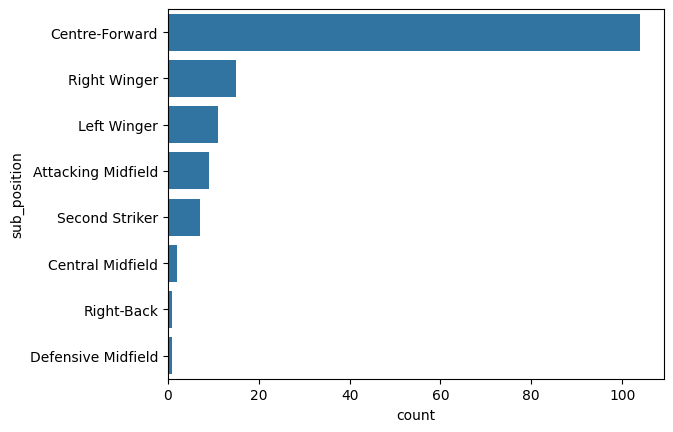

In [ ]:
# plt.subplots(figsize=(14, 5))
sns.barplot(orient = 'h', y = counts.loc[counts.Goals > 100, 'sub_position'].value_counts().index,
x = counts.loc[counts.Goals > 100, 'sub_position'].value_counts())

In [ ]:
counts.columns

Index(['player_id', 'Cards', 'Goals', 'Shootout', 'Substitutions', 'name',
       'sub_position', 'country_of_birth', 'height_in_cm', 'date_of_birth',
       'current_club_name', 'foot', 'highest_market_value_in_eur',
       'market_value_in_eur', 'age', 'year_of_birth'],
      dtype='object')

# Новый раздел

<Axes: >

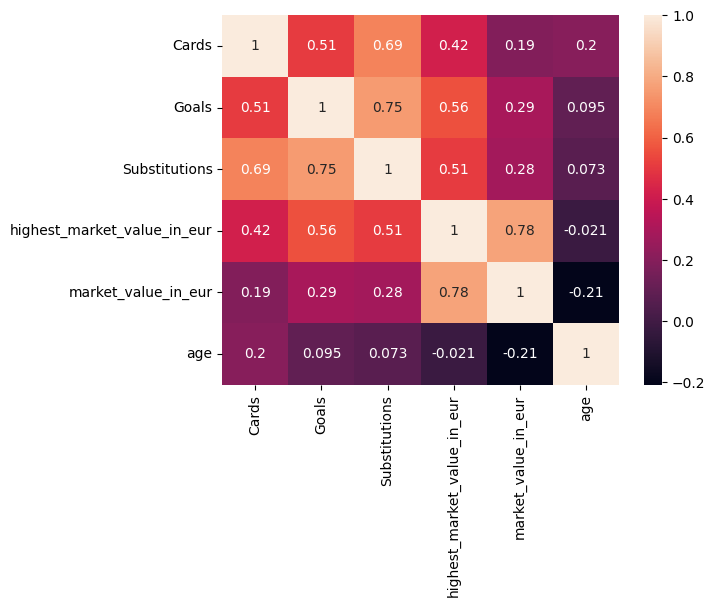

In [ ]:
numeric_cols = counts[['Cards', 'Goals','Substitutions',
                      'highest_market_value_in_eur', 'market_value_in_eur', 'age']]
corr_coef = numeric_cols.corr()
sns.heatmap(corr_coef, annot=True)

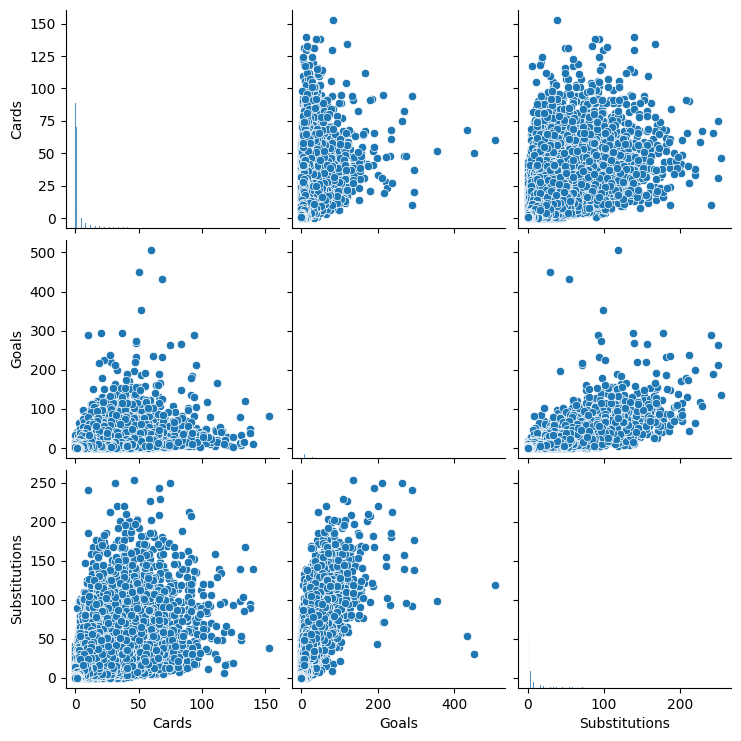

In [ ]:
sns.pairplot(counts[['Cards', 'Goals', 'Substitutions']])

In [ ]:
counts_market_value_30 = counts.loc[counts['highest_market_value_in_eur'] > 30000000]

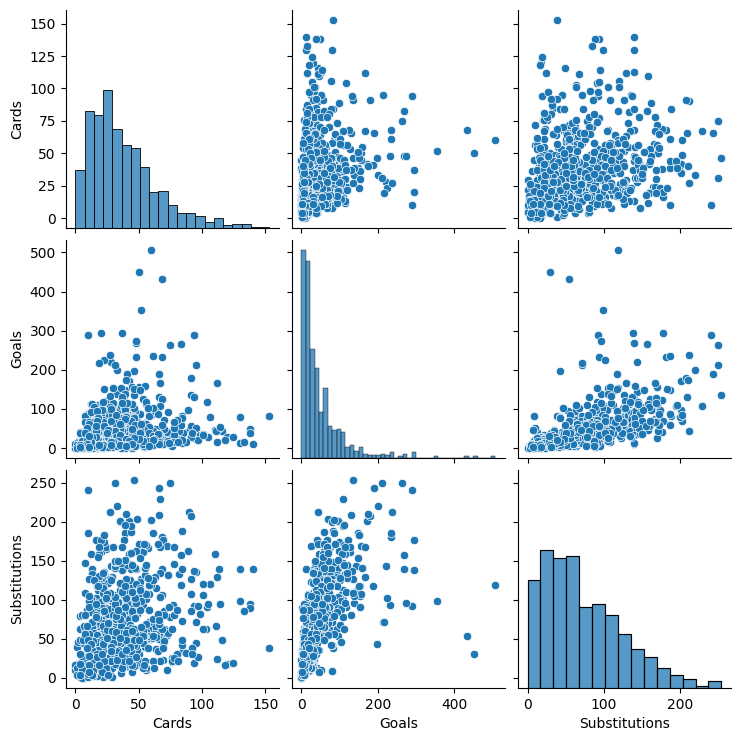

In [ ]:
sns.pairplot(counts_market_value_30[['Cards', 'Goals', 'Substitutions']])

In [ ]:
counts.sub_position.value_counts()

,count
sub_position,
Centre-Back,4546
Centre-Forward,3873
Central Midfield,3068
Defensive Midfield,2196
Right-Back,1956
Left-Back,1838
Attacking Midfield,1783
Left Winger,1748
Goalkeeper,1670


In [ ]:
attack = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']

In [ ]:
counts_market_value_30 = counts.loc[(counts['highest_market_value_in_eur'] > 30000000)&
                                    (counts['sub_position'].isin(attack))]

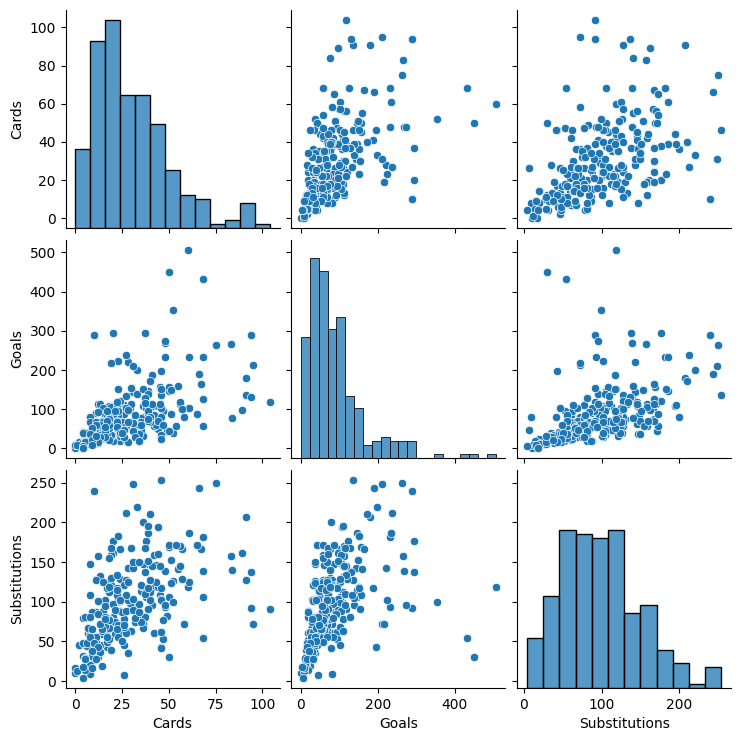

In [ ]:
sns.pairplot(counts_market_value_30[['Cards', 'Goals', 'Substitutions']])

In [ ]:
counts.head()

,player_id,Cards,Goals,Shootout,Substitutions,name,sub_position,country_of_birth,height_in_cm,date_of_birth,current_club_name,foot,highest_market_value_in_eur,market_value_in_eur,age,year_of_birth
0,10,19,48,0,52,Miroslav Klose,Centre-Forward,Poland,184.0,1978-06-09,Società Sportiva Lazio S.p.A.,right,30000000.0,1000000.0,47.0,1978.0
1,26,6,0,0,0,Roman Weidenfeller,Goalkeeper,Germany,190.0,1980-08-06,Borussia Dortmund,left,8000000.0,750000.0,45.0,1980.0
2,65,12,38,0,35,Dimitar Berbatov,Centre-Forward,Bulgaria,NaN,1981-01-30,Panthessalonikios Athlitikos Omilos Konstantin...,NaN,34500000.0,1000000.0,44.0,1981.0
3,77,0,0,0,1,Lúcio,Centre-Back,Brazil,NaN,1978-05-08,Juventus Football Club,NaN,24500000.0,200000.0,47.0,1978.0
4,109,4,1,0,3,Dedê,Left-Back,Brazil,NaN,1978-04-18,Eskisehirspor,NaN,9500000.0,400000.0,47.0,1978.0


<Axes: >

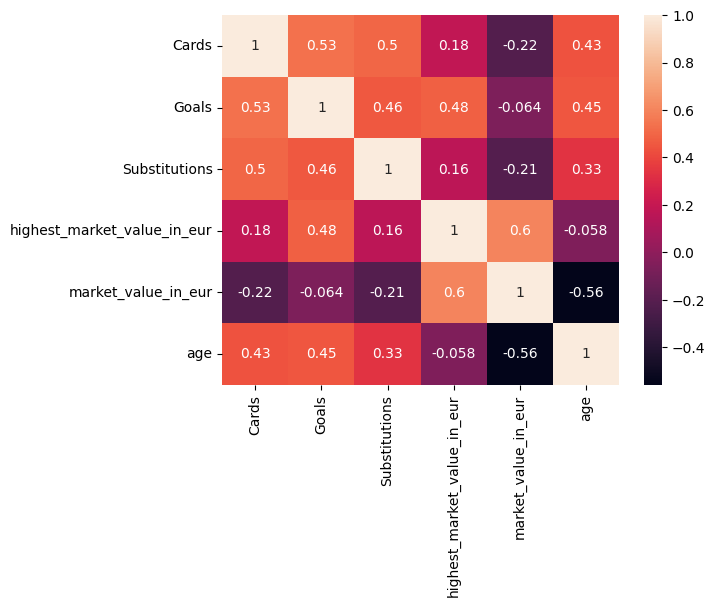

In [ ]:
numeric_cols_market30 = counts_market_value_30[['Cards', 'Goals','Substitutions',
                      'highest_market_value_in_eur', 'market_value_in_eur', 'age']]
corr_coef_market30 = numeric_cols_market30.corr()
sns.heatmap(corr_coef_market30, annot = True)

# Трансферы

In [ ]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'age'],
      dtype='object')

In [ ]:
players.current_club_id

,current_club_id
0,398
1,16
2,1091
3,506
4,27
...,...
32596,86209
32597,1096
32598,2778
32599,1096


In [ ]:
transfers['Revenue'] = transfers.market_value_in_eur - transfers.transfer_fee

In [ ]:
transfers.sort_values(by='Revenue', ascending=False).head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,Revenue
4926,342229,2024-07-01,24/25,583,418,Paris SG,Real Madrid,0.0,180000000.0,Kylian Mbappé,180000000.0
49883,342229,2018-06-30,17/18,583,162,Paris SG,Monaco,0.0,120000000.0,Kylian Mbappé,120000000.0
2206,401923,2024-09-04,24/25,6195,141,Napoli,Galatasaray,0.0,100000000.0,Victor Osimhen,100000000.0
20978,418560,2022-07-01,22/23,16,281,Bor. Dortmund,Man City,60000000.0,150000000.0,Erling Haaland,90000000.0
40047,80444,2019-08-19,19/20,131,27,Barcelona,Bayern Munich,0.0,90000000.0,Philippe Coutinho,90000000.0
1426,566931,2025-01-29,24/25,23826,583,RB Leipzig,Paris SG,0.0,80000000.0,Xavi Simons,80000000.0
39605,68863,2019-09-02,19/20,46,583,Inter,Paris SG,0.0,80000000.0,Mauro Icardi,80000000.0
16387,182712,2023-01-31,22/23,281,27,Man City,Bayern Munich,0.0,70000000.0,João Cancelo,70000000.0
20476,96341,2022-07-01,22/23,631,46,Chelsea,Inter,0.0,70000000.0,Romelu Lukaku,70000000.0
333,401923,2025-06-30,24/25,141,6195,Galatasaray,Napoli,0.0,70000000.0,Victor Osimhen,70000000.0


In [ ]:
q95 = np.quantile(transfers.loc[transfers.Revenue.notna(), 'Revenue'], 0.95)

In [ ]:
q95

np.float64(8000000.0)

In [ ]:
most_transfers = transfers.loc[transfers.Revenue > q95]

In [ ]:
most_transfers['good_revenue_count'] = (
    most_transfers.groupby('to_club_name')['Revenue'].transform('count')
)


/tmp/ipython-input-3729458454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_transfers['good_revenue_count'] = (


In [ ]:
top100 = (
    most_transfers.groupby(['to_club_name', 'to_club_id'], as_index=False)['Revenue']
    .count()
    .sort_values(by = 'Revenue',ascending=False)
    .head(100)
)


In [ ]:
clubs

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.6,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.5,21,70.0,18,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,NaN,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,26,27.7,14,53.8,18,Gewiss Stadium,24950,+€11.45m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,NaN,29,25.6,7,24.1,2,Ukraina,28051,€-3.35m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,26,26.4,17,65.4,3,Estádio C. J. de Almeida Freitas,6150,+€2.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [ ]:
top100_dict = cat(top100)

In [ ]:
top100

,to_club_name,to_club_id,Revenue
51,Chelsea,631,84
108,Juventus,506,64
105,Inter,46,60
6,AS Roma,12,58
27,Barcelona,131,48
...,...,...,...
148,Parma,130,4
95,Granada CF,16795,4
156,RCD Mallorca,237,4
178,Salernitana,380,4


In [ ]:
top100['domestic_competition_id'] = top100.to_club_id.map(top100_dict)

In [ ]:
top100

,to_club_name,to_club_id,Revenue,domestic_competition_id
51,Chelsea,631,84,GB1
108,Juventus,506,64,IT1
105,Inter,46,60,IT1
6,AS Roma,12,58,IT1
27,Barcelona,131,48,ES1
...,...,...,...,...
148,Parma,130,4,IT1
95,Granada CF,16795,4,ES1
156,RCD Mallorca,237,4,ES1
178,Salernitana,380,4,IT1


In [ ]:
leagues = {
    comp_id: competitions.loc[competitions['competition_id'] == comp_id, 'country_name'].values[0]
    for comp_id in clubs['domestic_competition_id'].unique()
}
leagues

{'L1': 'Germany',
 'RU1': 'Russia',
 'TR1': 'Turkey',
 'IT1': 'Italy',
 'GB1': 'England',
 'BE1': 'Belgium',
 'DK1': 'Denmark',
 'NL1': 'Netherlands',
 'GR1': 'Greece',
 'PO1': 'Portugal',
 'SC1': 'Scotland',
 'ES1': 'Spain',
 'UKR1': 'Ukraine',
 'FR1': 'France'}

In [ ]:
top5_league = ['Spain', 'France', 'Italy', 'England', 'Germany']

In [ ]:
top100['league'] = top100.domestic_competition_id.map(leagues)

<Axes: xlabel='count', ylabel='league'>

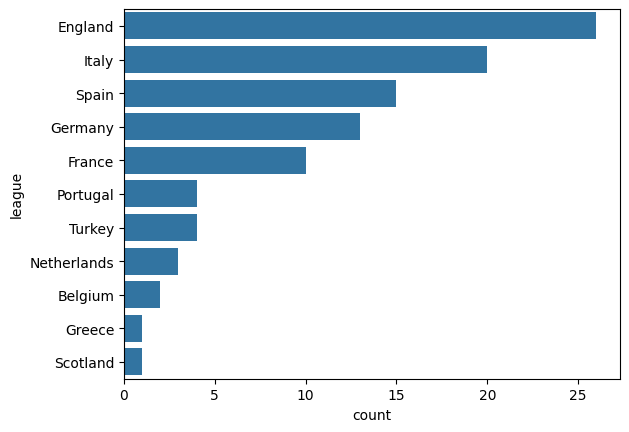

In [ ]:
sns.barplot(y = top100.league.value_counts().index,
            x = top100.league.value_counts(),
            orient = 'h', errorbar=None)

# Лига-лидер по расходам

In [ ]:
exp_transfers = transfers.loc[transfers.transfer_fee > 50000000]

In [ ]:
exp_dict = cat(exp_transfers)

In [ ]:
exp_transfers['domestic_competition_id'] = exp_transfers.to_club_id.map(exp_dict)

/tmp/ipython-input-770139117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_transfers['domestic_competition_id'] = exp_transfers.to_club_id.map(exp_dict)


In [ ]:
exp_transfers['leagues'] = exp_transfers.domestic_competition_id.map(leagues)

/tmp/ipython-input-1411310503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_transfers['leagues'] = exp_transfers.domestic_competition_id.map(leagues)


<Axes: xlabel='leagues', ylabel='count'>

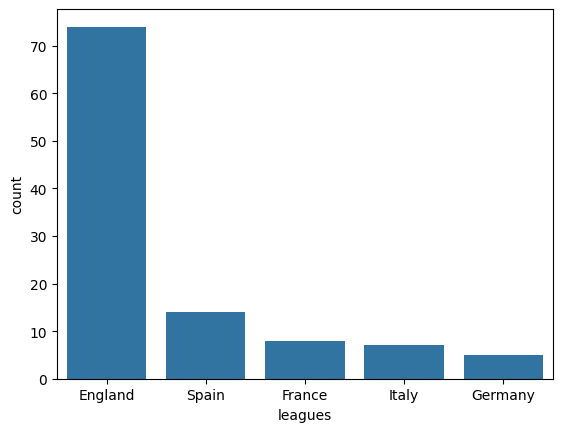

In [ ]:
sns.barplot(x = exp_transfers.leagues.value_counts().index,
            y = exp_transfers.leagues.value_counts(), errorbar = None)

In [ ]:
transfers.columns

Index(['player_id', 'transfer_date', 'transfer_season', 'from_club_id',
       'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee',
       'market_value_in_eur', 'player_name', 'Revenue'],
      dtype='object')

# Процент левшей

In [ ]:
left_ratio = players.loc[players.foot == 'left'].shape[0] / players.foot.notnull().sum()
right_ratio = 1 - left_ratio

print(f"Процент левшей в футболе: {round(left_ratio * 100, 2)} %")
print(f"Процент правшей в футболе: {round(right_ratio * 100, 2)} %")

Процент левшей в футболе: 25.05 %
Процент правшей в футболе: 74.95 %


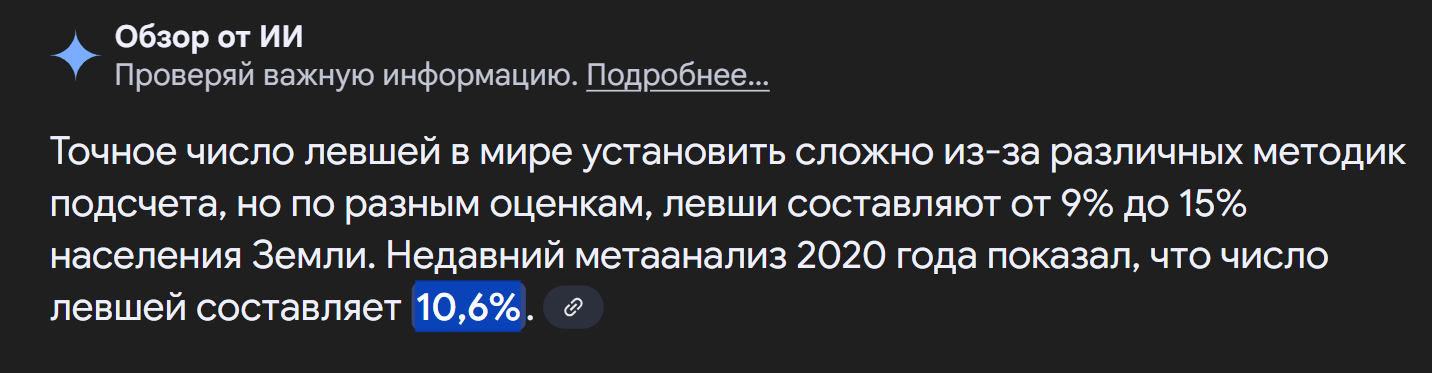

In [ ]:
from datetime import date
var_date = date(2018, 3, 3)

In [ ]:
# for i in counts.loc[counts['type'] == 'cards', ['count', 'date']]